# [Dacon]JobCare Recommendation Algorithm

[잡케어 추천 알고리즘 경진대회](https://dacon.io/competitions/official/235863/overview/description)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from typing import Dict

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.preprocessing import RobustScaler

In [ ]:
path = '/content/drive/MyDrive/job_care/data/'
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

feature_D = pd.read_csv(path + '속성_D_코드.csv', index_col=0).T.to_dict()
feature_H = pd.read_csv(path + '속성_H_코드.csv', index_col=0).T.to_dict()
feature_L = pd.read_csv(path + '속성_L_코드.csv', index_col=0).T.to_dict()

print("train_data.shape: ", train.shape)
print("test_data.shape: ", test.shape)

train_data.shape:  (501951, 35)
test_data.shape:  (46404, 34)


[데이터 - 속성 코드 매칭](https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent)

In [ ]:
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

train = add_code(train, feature_D, feature_H, feature_L)
test = add_code(test, feature_D, feature_H, feature_L)
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

train.shape:  (501951, 63)
test.shape:  (46404, 62)


# Check Dataset

Features

 	d_l_match_yn :  속성 D 대분류 매칭 여부

 	d_m_match_yn :  속성 D 중분류 매칭 여부

 	d_s_match_yn :  속성 D 소분류 매칭 여부

 	h_l_match_yn :  속성 H 대분류 매칭 여부

 	h_m_match_yn :  속성 H 중분류 매칭 여부

 	h_s_match_yn :  속성 H 소분류 매칭 여부

 	person_attribute_a :  회원 속성 A

 	person_attribute_a_1 :  회원 속성 A 하위 속성 1

 	person_attribute_b :  회원 속성 B

 	person_prefer_c :  회원 선호 속성 C

 	person_prefer_d_1 :  회원 선호 속성 D 1번

 	person_prefer_d_2 :  회원 선호 속성 D 2번

 	person_prefer_d_3 :  회원 선호 속성 D 3번

 	person_prefer_e :  회원 선호 속성 E

 	person_prefer_f :  회원 선호 속성 F

 	person_prefer_g :  회원 선호 속성 G

 	person_prefer_h_1 :  회원 선호 속성 H 1번

 	person_prefer_h_2 :  회원 선호 속성 H 2번

 	person_prefer_h_3 :  회원 선호 속성 H 3번

 	contents_attribute_i :  컨텐츠 속성 I

 	contents_attribute_a :  컨텐츠 속성 A

 	contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1

 	contents_attribute_j :  컨텐츠 속성 J

 	contents_attribute_c :  컨텐츠 속성 C

 	contents_attribute_k :  컨텐츠 속성 K

 	contents_attribute_l :  컨텐츠 속성 L

 	contents_attribute_d :  컨텐츠 속성 D

 	contents_attribute_m :  컨텐츠 속성 M

 	contents_attribute_e :  컨텐츠 속성 E

 	contents_attribute_h :  컨텐츠 속성 H

	 person_rn :  사용자번호

 	contents_rn :  컨텐츠번호

	 contents_open_dt :  컨텐츠 열람 일시

 	target :  컨텐츠 사용 여부 (라벨)


참가자 제공 레이아웃.pdf : 데이터 컬럼에 대한 세부 설명



속성_D_코드.csv : 속성 D의 세분류, 소, 중, 대분류 코드  

속성_L_코드.csv : 속성 L의 세분류, 소, 중, 대분류 코드 

속성_H_코드.csv : 속성 H의 코드와 상위코드

In [ ]:
for f in ['d', 'h']:
  for s in ['l', 'm', 's']:
    col = f"{f}_{s}_match_yn"
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)

In [ ]:
print(train.shape)
train.head()

(501951, 63)


,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016
1,1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016
2,2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016
3,3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016
4,4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016


In [ ]:
train.describe()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.0,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,5.019510e+05,501951.000000,501951.00000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000
mean,250975.000000,0.628085,0.266215,0.149929,0.795572,0.364842,0.272196,1.340055,2.575767,2.782742,2.380049,537.296399,545.833926,534.994095,3.626302,1.0,1.0,116.394919,136.011991,122.784720,2.447811,2.332622,5.893970,1.237806,1.386052,1.963307,1030.863194,581.505215,2.240486,3.922988,132.530916,5.141115e+05,337674.345074,0.49974,535.598700,530.018906,495.297071,421.916705,543.900966,536.908378,496.681929,425.763019,533.590659,526.331489,485.808073,412.172706,579.414244,573.707605,541.372935,460.836524,107.442511,409.648802,127.984672,425.593183,114.940871,415.585240,118.564384,422.450490,1028.859082,1024.059269,1008.445245,2010.501724
std,144900.916822,0.483316,0.441979,0.357002,0.403284,0.481386,0.445091,0.473728,2.390872,0.883072,1.827910,411.441926,403.328742,415.752072,1.846717,0.0,0.0,91.032989,93.756209,90.947916,0.842948,0.887333,2.143146,0.425740,0.793128,0.188007,527.235733,413.915756,1.556468,1.159992,87.142309,2.943547e+05,219518.485557,0.50000,411.650059,414.337987,429.295675,398.177923,403.966058,408.086663,426.465285,399.528805,415.973371,419.998100,439.078291,408.868962,414.282254,416.872174,433.224168,397.156922,90.275804,72.488959,95.013225,74.960942,90.862183,72.397541,88.975338,68.569269,527.460681,528.881763,530.403154,5.211779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.0,1.0,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,7.000000e+00,20.000000,0.00000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,315.000000,1.000000,315.000000,1.000000,315.000000,3.000000,317.000000,1.000000,1.000000,1.000000,2004.000000
25%,125487.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,117.000000,148.000000,136.00

In [ ]:
# this codes are move to feature engineering
"""
train['contents_open_dt'] = pd.to_datetime(train['contents_open_dt'], format='%Y-%m-%d %H:%M:%S')

train.loc[:, 'contents_open_year'] = train['contents_open_dt'].dt.year
train.loc[:, 'contents_open_month'] = train['contents_open_dt'].dt.month
train.loc[:, 'contents_open_day'] = train['contents_open_dt'].dt.day
train.loc[:, 'contents_open_hour'] = train['contents_open_dt'].dt.hour
train.loc[:, 'contents_open_minute'] = train['contents_open_dt'].dt.minute
train.loc[:, 'contents_open_second'] = train['contents_open_dt'].dt.second

train = train.drop(['id', 'contents_open_dt'], axis=1)
"""
train.shape

(501951, 67)

In [ ]:
print(train.shape)
train.head()

(501951, 67)


,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,contents_open_year,contents_open_month,contents_open_day,contents_open_hour,contents_open_minute,contents_open_second
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,2020,1,17,12,9,36
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,2020,6,18,17,48,52
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,2020,7,8,20,0,10
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,2020,1,13,18,9,34
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,2020,3,9,20,39,22


In [ ]:
train.describe()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,contents_open_year,contents_open_month,contents_open_day,contents_open_hour,contents_open_minute,contents_open_second
count,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.0,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,5.019510e+05,501951.000000,501951.00000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000,501951.0,501951.000000,501951.000000,501951.000000,501951.000000,501951.000000
mean,0.628085,0.266215,0.149929,0.795572,0.364842,0.272196,1.340055,2.575767,2.782742,2.380049,537.296399,545.833926,534.994095,3.626302,1.0,1.0,116.394919,136.011991,122.784720,2.447811,2.332622,5.893970,1.237806,1.386052,1.963307,1030.863194,581.505215,2.240486,3.922988,132.530916,5.141115e+05,337674.345074,0.49974,535.598700,530.018906,495.297071,421.916705,543.900966,536.908378,496.681929,425.763019,533.590659,526.331489,485.808073,412.172706,579.414244,573.707605,541.372935,460.836524,107.442511,409.648802,127.984672,425.593183,114.940871,415.585240,118.564384,422.450490,1028.859082,1024.059269,1008.445245,2010.501724,2020.0,5.931754,15.558186,13.888037,29.525747,29.546778
std,0.483316,0.441979,0.357002,0.403284,0.481386,0.445091,0.473728,2.390872,0.883072,1.827910,411.441926,403.328742,415.752072,1.846717,0.0,0.0,91.032989,93.756209,90.947916,0.842948,0.887333,2.143146,0.425740,0.793128,0.188007,527.235733,413.915756,1.556468,1.159992,87.142309,2.943547e+05,219518.485557,0.50000,411.650059,414.337987,429.295675,398.177923,403.966058,408.086663,426.465285,399.528805,415.973371,419.998100,439.078291,408.868962,414.282254,416.872174,433.224168,397.156922,90.275804,72.488959,95.013225,74.960942,90.862183,72.397541,88.975338,68.569269,527.460681,528.881763,530.403154,5.211779,0.0,3.175515,8.647293,5.568358,17.323598,17.319696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,4.000000,0.000000,1.0,1.0,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,5.000000,7.000000e+00,20.000000,0.00000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000

In [ ]:
print(f"# of train data : {train.shape[0]}")
print(f"# of train features : {train.shape[1] - 1}")

# of train data : 501951
# of train features : 66


## Check NULL Data

In [ ]:
print("")
print('='*15, " >> Null Data << ", '='*15)
null_feature = []
for col in train.columns:
    msg = 'column: {:>25}\t {:>10d} of {:<10d} ( Percent of Null value: {:.2f}% )'.format(col, train[col].isnull().sum(), train[col].shape[0], 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)
    if train[col].isnull().sum() != 0:
        null_feature.append(col)


if len(null_feature) != 0:
    print("")
    print('='*15, " >> Warning << ", '='*15)
    print("NULL Feature : ", null_feature)

del null_feature


===============  >> Null Data <<  ===============
column:              d_l_match_yn	          0 of 501951     ( Percent of Null value: 0.00% )
column:              d_m_match_yn	          0 of 501951     ( Percent of Null value: 0.00% )
column:              d_s_match_yn	          0 of 501951     ( Percent of Null value: 0.00% )
column:              h_l_match_yn	          0 of 501951     ( Percent of Null value: 0.00% )
column:              h_m_match_yn	          0 of 501951     ( Percent of Null value: 0.00% )
column:              h_s_match_yn	          0 of 501951     ( Percent of Null value: 0.00% )
column:        person_attribute_a	          0 of 501951     ( Percent of Null value: 0.00% )
column:      person_attribute_a_1	          0 of 501951     ( Percent of Null value: 0.00% )
column:        person_attribute_b	          0 of 501951     ( Percent of Null value: 0.00% )
column:           person_prefer_c	          0 of 501951     ( Percent of Null value: 0.00% )
column:         per

## Check Unique Data

In [ ]:
print('='*15, " >> Unique Data << ", '='*15)

unique_col = []
for col in train.columns:
    msg = 'column: {:>25}\t {:>10d}'.format(col, len(train[col].unique()) )
    print(msg)
    if len(train[col].unique()) == 1:
        unique_col.append(col)

if len(unique_col) != 0:
    print("")
    print('='*15, " >> Warning << ", '='*15)
    print("Unique Feature : ", unique_col)

del unique_col

===============  >> Unique Data <<  ===============
column:              d_l_match_yn	          2
column:              d_m_match_yn	          2
column:              d_s_match_yn	          2
column:              h_l_match_yn	          2
column:              h_m_match_yn	          2
column:              h_s_match_yn	          2
column:        person_attribute_a	          2
column:      person_attribute_a_1	          8
column:        person_attribute_b	          6
column:           person_prefer_c	          5
column:         person_prefer_d_1	       1093
column:         person_prefer_d_2	       1081
column:         person_prefer_d_3	       1043
column:           person_prefer_e	         12
column:           person_prefer_f	          1
column:           person_prefer_g	          1
column:         person_prefer_h_1	        279
column:         person_prefer_h_2	        279
column:         person_prefer_h_3	        279
column:      contents_attribute_i	          3
column:      contents_attrib

train.shape[0] > person_rn의 unique value 개수 이므로 중복된 회원있다

In [ ]:
# this code is move to feature engineering function
# train = train.drop(unique_col, axis=1)
train.shape

(501951, 64)

In [ ]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,contents_open_month,contents_open_day,contents_open_hour,contents_open_minute,contents_open_second
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,1,17,12,9,36
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,6,18,17,48,52
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,7,8,20,0,10
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,1,13,18,9,34
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,3,9,20,39,22


In [ ]:
train.drop_duplicates()
train.shape

(501951, 64)

## Check Target Label

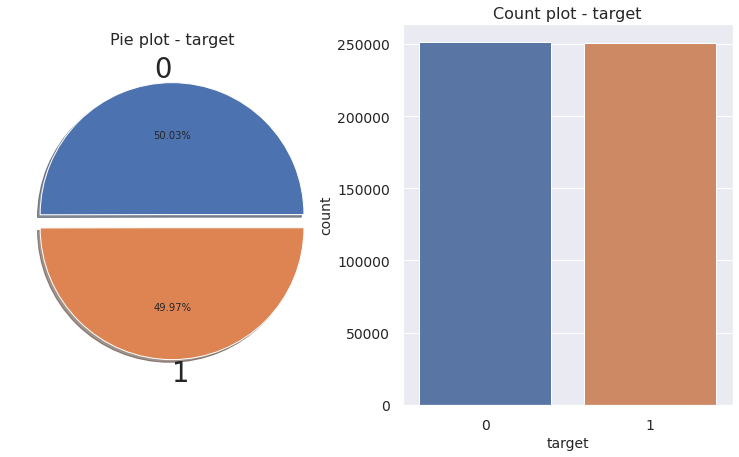

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(13, 7))

train['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - target', fontsize=16)
ax[0].set_ylabel('')
ax[0].tick_params(axis='both', labelsize=14)

ax[1].set_title('Count plot - target', fontsize=16)
sns.countplot('target', data=train, ax=ax[1])
ax[1].set_ylabel('count', fontsize = 14)
ax[1].set_xlabel('target', fontsize = 14)
ax[1].tick_params(axis='both', labelsize=14)

plt.show()

## Check Data by person_rn

All features of Personal Information by person_rn are same

In [ ]:
print('='*15, " >> data by person_rn << ", '='*15)

cols = []
for col in train.columns:
    if 'person' in col:
        cols.append(col)
cols.remove('person_rn')

# person_rn
person_rn = train["person_rn"].unique()
# personal information compressed(meaned) by person_rn
train_groupby_person_rn = train.groupby(train["person_rn"]).mean()

check = 0
num_person_rn = []
len_person_rn = len(person_rn)
# if one data by person_rn is matched with mean peronal information, personal information is all same
# if not personal information is same, and it may be surveyed each time to choose content
i = 0
for personal_number in person_rn:
    i += 1
    x = train.loc[train["person_rn"] == personal_number].iloc[0][cols]
    y = train_groupby_person_rn.loc[personal_number][cols]

    # person_rn의 첫번째 데이터와 person_rn의 모든 데이터의 평균이 같으면 personal information이 같다고 판단하겠다
    msg = f"person_rn {i:>10} of {len_person_rn:>10} : {personal_number:>10} : {'true' if (x == y).all() else 'false':>10}"
    print(msg)

    if not (x == y).all():
        check = 1
        num_person_rn.append(col)

if check == 0:
    print("")
    print("All features of Personal Information by person_rn are same")
else:
    print("")
    print('='*15, " >> Warning << ", '='*15)
    print("These person_rn has different Personal Information : ", num_person_rn)

del cols
del check
del num_person_rn
del len_person_rn

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
person_rn     295180 of     300177 :     276128 :       true
person_rn     295181 of     300177 :     266570 :       true
person_rn     295182 of     300177 :     282896 :       true
person_rn     295183 of     300177 :    1044091 :       true
person_rn     295184 of     300177 :     284465 :       true
person_rn     295185 of     300177 :     262075 :       true
person_rn     295186 of     300177 :     913965 :       true
person_rn     295187 of     300177 :     282567 :       true
person_rn     295188 of     300177 :    1009817 :       true
person_rn     295189 of     300177 :     276063 :       true
person_rn     295190 of     300177 :     207215 :       true
person_rn     295191 of     300177 :     876687 :       true
person_rn     295192 of     300177 :      30649 :       true
person_rn     295193 of     300177 :      19062 :       true
person_rn     295194 of     300177 :      14553 :       true
person_rn     295195 of     300177 :     767410 :

In [ ]:
person_rn_train = train["person_rn"].unique()
person_rn_test = test["person_rn"].unique()

count = 0
not_in_train = []

for p in person_rn_test:
    if p in person_rn_train:
      print(f"person_rn {p:>10} is in test set")
      count += 1
    else:
      not_in_train.append(p)

print(f"{count} person_rn_test of {len(person_rn_test)} are in train set")
if not_in_train:
    print(f"these person_rn_test are not in train set\n :{not_in_train}")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
person_rn     491397 is in test set
person_rn     960032 is in test set
person_rn     150365 is in test set
person_rn     741361 is in test set
person_rn     741588 is in test set
person_rn      44163 is in test set
person_rn     332658 is in test set
person_rn     445490 is in test set
person_rn     146692 is in test set
person_rn      87458 is in test set
person_rn     189361 is in test set
person_rn     250843 is in test set
person_rn     226999 is in test set
person_rn     212279 is in test set
person_rn     148338 is in test set
person_rn     147792 is in test set
person_rn     782032 is in test set
person_rn     882252 is in test set
person_rn     189214 is in test set
person_rn      12340 is in test set
person_rn     877374 is in test set
person_rn     190114 is in test set
person_rn     494262 is in test set
person_rn     562658 is in test set
person_rn     360198 is in test set
person_rn     343104 is in test set
person_rn      99146 is in t

# EDA

In [ ]:
train.shape

(501951, 64)

...1 of 64 ...2 of 64 ...3 of 64 ...4 of 64 ...5 of 64 ...6 of 64 ...7 of 64 ...8 of 64 
...9 of 64 ...10 of 64 ...11 of 64 ...12 of 64 ...13 of 64 ...14 of 64 ...15 of 64 ...16 of 64 
...17 of 64 ...18 of 64 ...19 of 64 ...20 of 64 ...21 of 64 ...22 of 64 ...23 of 64 ...24 of 64 
...25 of 64 ...26 of 64 ...27 of 64 ...28 of 64 ...29 of 64 ...30 of 64 ...31 of 64 ...32 of 64 
...33 of 64 ...34 of 64 ...35 of 64 ...36 of 64 ...37 of 64 ...38 of 64 ...39 of 64 ...40 of 64 
...41 of 64 ...42 of 64 ...43 of 64 ...44 of 64 ...45 of 64 ...46 of 64 ...47 of 64 ...48 of 64 
...49 of 64 ...50 of 64 ...51 of 64 ...52 of 64 ...53 of 64 ...54 of 64 ...55 of 64 ...56 of 64 
...57 of 64 ...58 of 64 ...59 of 64 ...60 of 64 ...61 of 64 ...62 of 64 ...63 of 64 ...64 of 64 


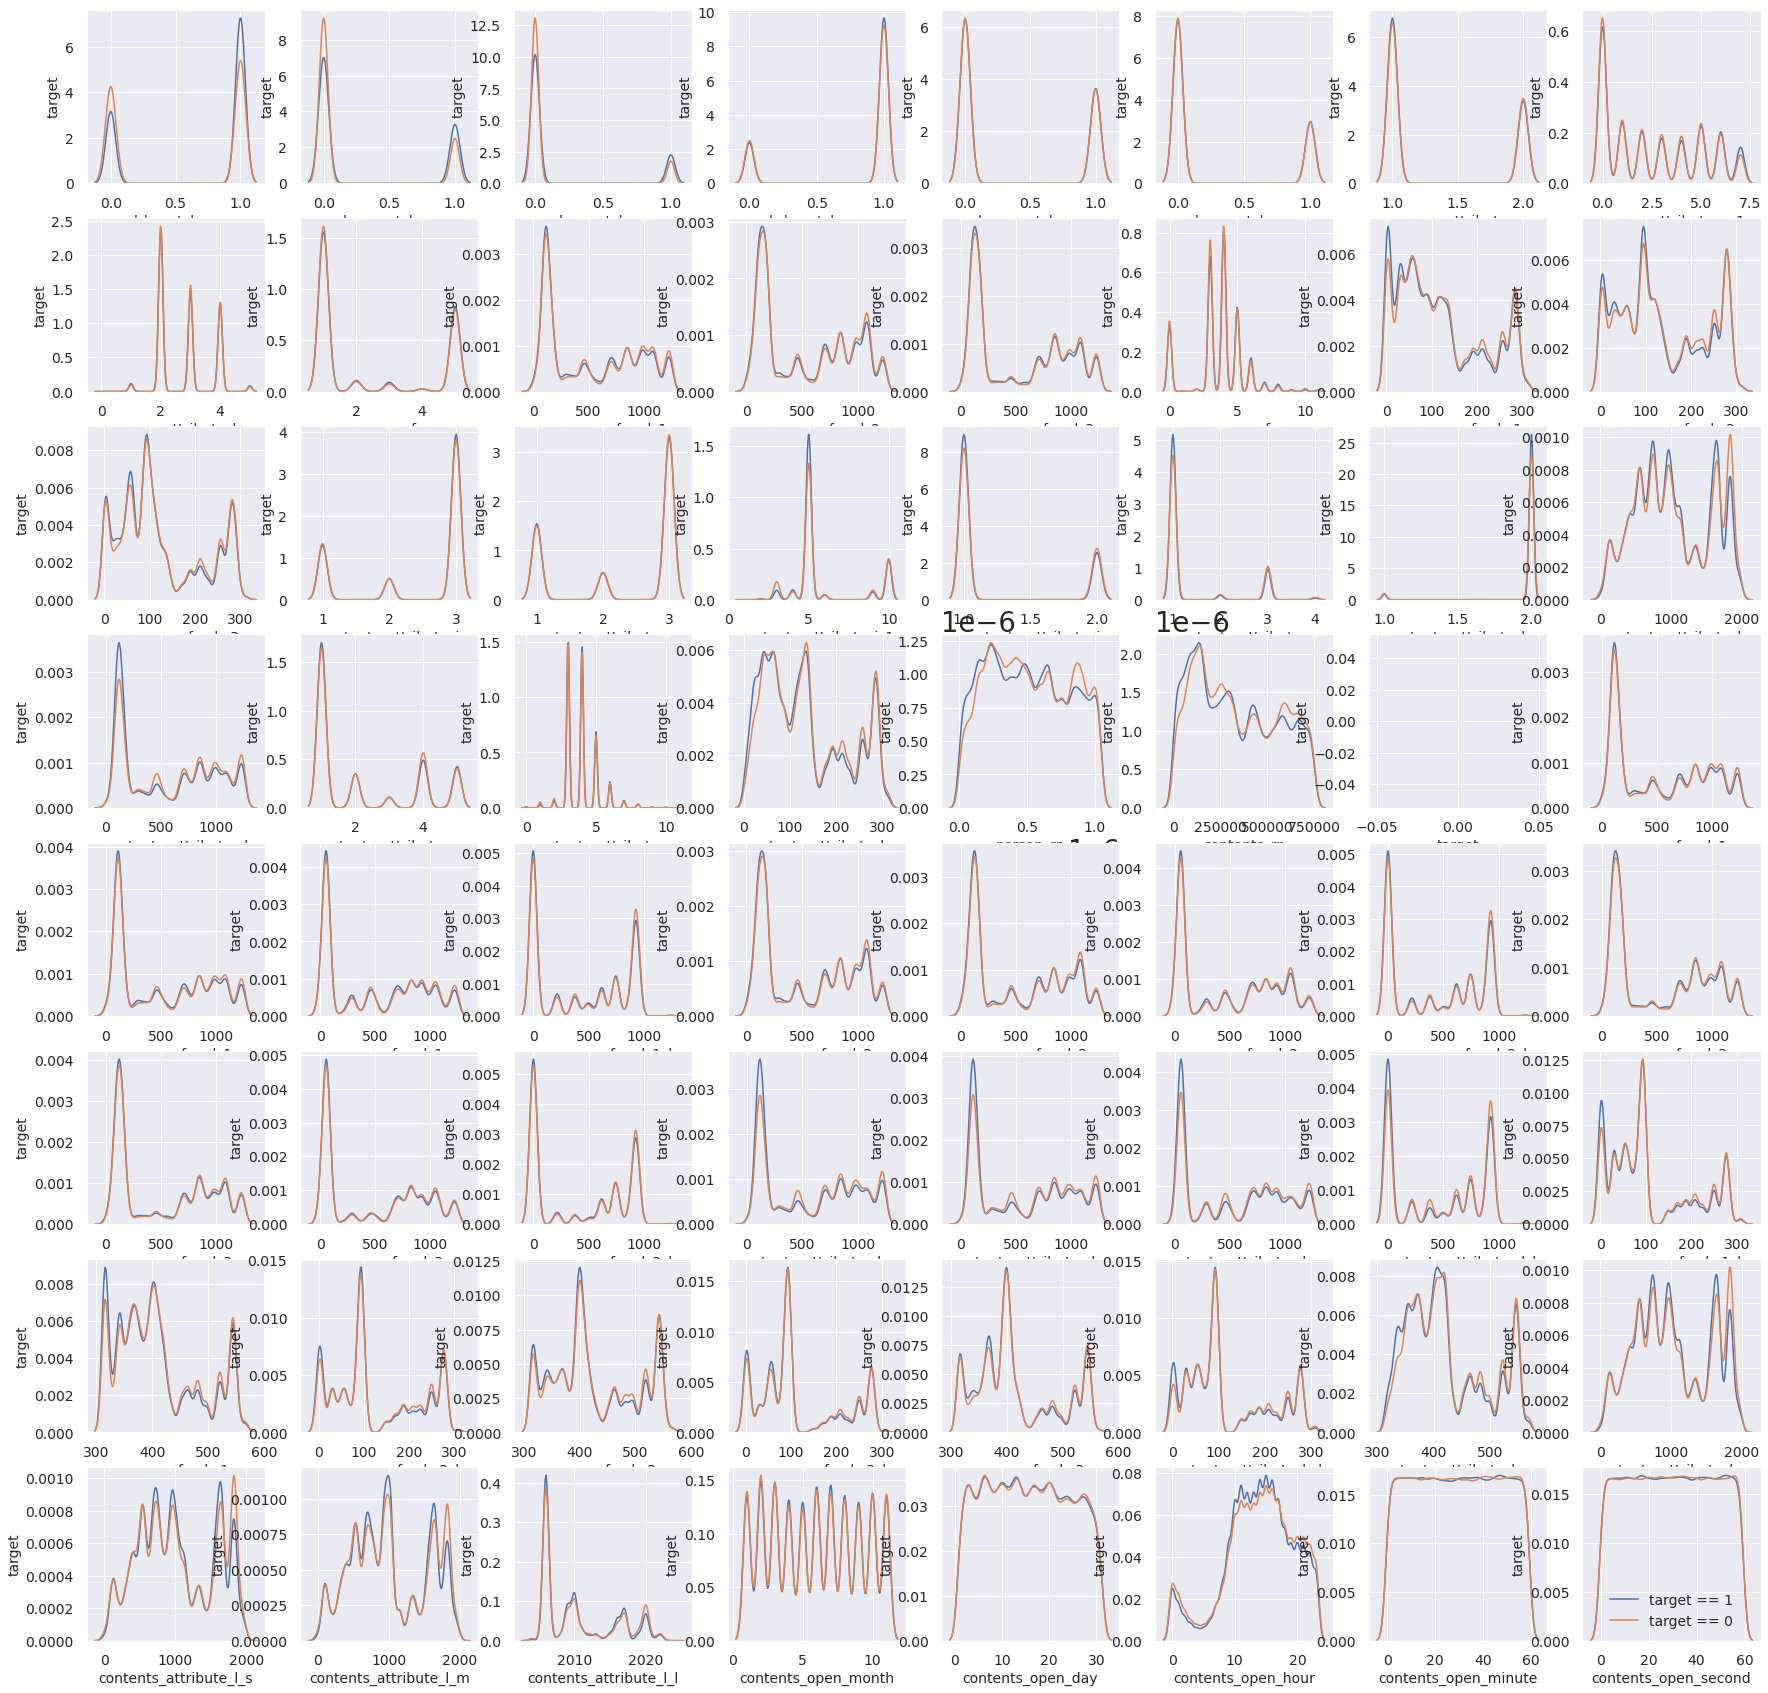

In [ ]:
row_num = 8
col_num = 8
fig, ax = plt.subplots(col_num, row_num, figsize=(30, 30))

for i in range(0, row_num):
  for j in range(0, col_num):
    col = train.columns[row_num*i + j]
    print(f"...{row_num*i + j +1} of {train.shape[1]}", end=" ")
    ax[i][j].set_xlabel(col, fontsize = 14)
    ax[i][j].set_ylabel("target", fontsize = 14)
    ax[i][j].tick_params(axis='both', labelsize=14)
    sns.kdeplot(train[train['target'] == 1][col], ax=ax[i][j])
    sns.kdeplot(train[train['target'] == 0][col], ax=ax[i][j])
  print("")

plt.legend(['target == 1', 'target == 0'], loc='upeer left', fontsize=14)
plt.show()

In [ ]:
# this code is move to feature engineering function
# train = train.drop(['contents_open_minute', 'contents_open_second'], axis=1)
train.shape

(501951, 62)

['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h', 'person_rn', 'contents_rn', 'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_2_n']
14
['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c', 'person_prefer_e', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j_1', 'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_m', 'contents_attribute_e', 'target', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l', 'contents_attribute_d_n', 'contents_attribute_d_s', 'contents_attribute_d_m', 'contents

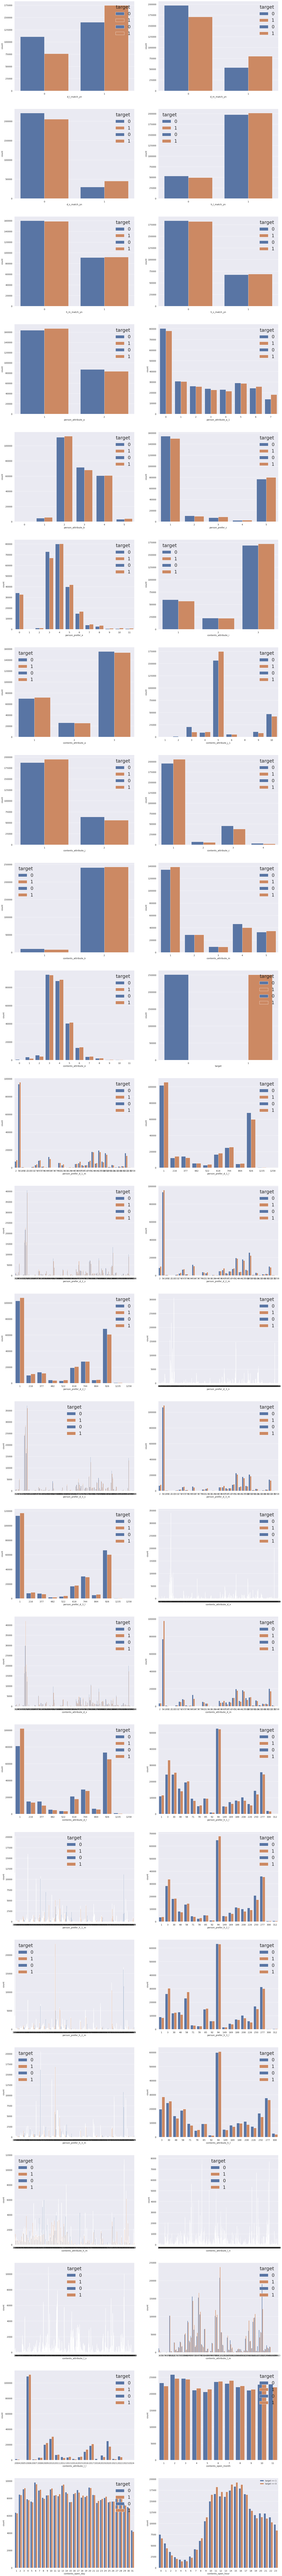

In [ ]:
# 100개를 넘기면 패스
cols_over_100 = []
for i in range(0, 12):
  for j in range(0, 3):
    col = train.columns[3*i + j]
    if len(train[col].unique()) > 100:
        cols_over_100.append(col)

print(cols_over_100)
print(len(cols_over_100))

cols = []
columns = train.columns
for col in columns:
    if not col in cols_over_100:
      cols.append(col)

print(cols)
print(len(cols))

row_num = 24
col_num = 2
fig, ax = plt.subplots(row_num, col_num, figsize=(30, 300))
n=0
for i in range(0, row_num):
  for j in range(0, col_num):
    print(f"...{col_num*i + j +1} of {len(cols)}", end=" ")

    col = cols[col_num*i + j]
    
    ax[i][j].set_xlabel(col, fontsize = 14)
    ax[i][j].set_ylabel("target", fontsize = 14)
    ax[i][j].tick_params(axis='both', labelsize=14)
    sns.countplot(col, hue='target', data=train, ax=ax[i][j])
    sns.countplot(col, hue='target', data=train, ax=ax[i][j])

plt.legend(['target == 1', 'target == 0'], fontsize=12)
plt.show()

# Feature Engineering

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def engineer_feature(df, training=True):
  df['d_l_match_yn']=df['d_l_match_yn'].replace([True,False],[1,0])
  df['d_m_match_yn']=df['d_m_match_yn'].replace([True,False],[1,0])
  df['d_s_match_yn']=df['d_s_match_yn'].replace([True,False],[1,0])
  df['h_l_match_yn']=df['h_l_match_yn'].replace([True,False],[1,0])
  df['h_m_match_yn']=df['h_m_match_yn'].replace([True,False],[1,0])
  df['h_s_match_yn']=df['h_s_match_yn'].replace([True,False],[1,0])

  df['contents_attribute_l_l'] -= 2000 # it looks like year
  
  df = df.drop(["person_rn", "contents_rn"], axis=1)

  df['contents_open_dt'] = pd.to_datetime(df['contents_open_dt'], format='%Y-%m-%d %H:%M:%S')

  df.loc[:, 'contents_open_year'] = df['contents_open_dt'].dt.year
  df.loc[:, 'contents_open_month'] = df['contents_open_dt'].dt.month
  df.loc[:, 'contents_open_day'] = df['contents_open_dt'].dt.day
  df.loc[:, 'contents_open_hour'] = df['contents_open_dt'].dt.hour
  df.loc[:, 'contents_open_minute'] = df['contents_open_dt'].dt.minute
  df.loc[:, 'contents_open_second'] = df['contents_open_dt'].dt.second

  df = df.drop(['id', 'contents_open_dt'], axis=1)

  unique_col = ['person_prefer_f', 'person_prefer_g', 'contents_open_year']
  df = df.drop(unique_col, axis=1)

  df = df.drop(['contents_open_minute', 'contents_open_second'], axis=1)
  df = df.drop(['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3'], axis=1)
  df = df.drop(['contents_attribute_l', 'contents_attribute_d', 'contents_attribute_h'], axis=1)

  cols = ['person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 
          'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
          'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l',
          'person_prefer_h_1_l', 'person_prefer_h_1_m', 'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l', 'person_prefer_h_3_m',
          'contents_attribute_l_n','contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l',
          'contents_attribute_d_n', 'contents_attribute_d_s', 'contents_attribute_d_m', 'contents_attribute_d_l',
          'contents_attribute_h_l', 'contents_attribute_h_m']
  for col in df.columns:
      if col in cols:
        ordinal_encoder = OrdinalEncoder()
        df_col_encoded = ordinal_encoder.fit_transform(df[col].to_numpy().reshape(-1, 1))
        df[col]= df_col_encoded
  
  if training == True:
      df = df[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn',
               'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
               'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 
               'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
               'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l',
               'person_prefer_e',
               'person_prefer_h_1_l', 'person_prefer_h_1_m', 'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l', 'person_prefer_h_3_m',
               'contents_open_month', 'contents_open_day', 'contents_open_hour',

               'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn',
               'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c', 'contents_attribute_k', 
               'contents_attribute_l_n','contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l',
               'contents_attribute_d_n', 'contents_attribute_d_s', 'contents_attribute_d_m', 'contents_attribute_d_l',
               'contents_attribute_m', 'contents_attribute_e', 
               'contents_attribute_h_l', 'contents_attribute_h_m',
               'contents_open_month', 'contents_open_day', 'contents_open_hour',

               'target']]
  else:
      df = df[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn',
               'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
               'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l', 
               'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
               'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l',
               'person_prefer_e',
               'person_prefer_h_1_l', 'person_prefer_h_1_m', 'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l', 'person_prefer_h_3_m',
               'contents_open_month', 'contents_open_day', 'contents_open_hour',

               'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn', 'h_m_match_yn', 'h_s_match_yn',
               'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c', 'contents_attribute_k', 
               'contents_attribute_l_n','contents_attribute_l_s', 'contents_attribute_l_m', 'contents_attribute_l_l',
               'contents_attribute_d_n', 'contents_attribute_d_s', 'contents_attribute_d_m', 'contents_attribute_d_l',
               'contents_attribute_m', 'contents_attribute_e', 
               'contents_attribute_h_l', 'contents_attribute_h_m',
               'contents_open_month', 'contents_open_day', 'contents_open_hour']]
  return df

train = engineer_feature(train)
test = engineer_feature(test, training=False)
print(train.shape)
print(test.shape)

(501951, 60)
(46404, 59)


In [ ]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']
X_test = test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(501951, 59)
(501951,)
(46404, 59)


# Data Augmentation

In [ ]:
true_information = train.loc[train['target'] == 1] # we need only true_information

true_information = true_information.drop(['target'], axis=1)
true_information.reset_index(inplace=True)

true_information.rename(columns = {'index' : 'id'}, inplace = True)
true_information

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,person_prefer_e,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_open_month,contents_open_day,contents_open_hour,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_k,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,contents_attribute_m,contents_attribute_e,contents_attribute_h_l,contents_attribute_h_m,contents_open_month,contents_open_day,contents_open_hour
0,0,1,1,1,0,0,0,1,4,3,5,91.0,27.0,6.0,1.0,121.0,36.0,7.0,1.0,116.0,35.0,7.0,1.0,8,1.0,1.0,9.0,83.0,4.0,53.0,1,17,12,1,1,1,0,0,0,3,3,2,10,1,2,586.0,237.0,60.0,12.0,89.0,27.0,6.0,1.0,1,4,8.0,98.0,1,17,12
1,5,0,0,0,1,0,0,1,1,2,5,54.0,14.0,1.0,0.0,54.0,14.0,1.0,0.0,45.0,12.0,1.0,0.0,4,5.0,64.0,14.0,176.0,0.0,0.0,6,29,20,0,0,0,1,0,0,3,3,1,5,1,2,586.0,237.0,60.0,12.0,89.0,27.0,6.0,1.0,1,4,4.0,60.0,6,29,20
2,7,1,0,0,1,0,0,1,2,2,1,122.0,36.0,7.0,1.0,98.0,28.0,7.0,1.0,49.0,13.0,1.0,0.0,5,9.0,97.0,9.0,107.0,9.0,84.0,8,4,20,1,0,0,1,0,0,3,1,2,10,1,2,586.0,237.0,60.0,12.0,89.0,27.0,6.0,1.0,5,4,8.0,93.0,8,4,20
3,17,1,0,0,1,1,1,1,3,2,5,352.0,105.0,26.0,8.0,421.0,130.0,33.0,8.0,316.0,98.0,25.0,8.0,6,9.0,107.0,9.0,84.0,9.0,92.0,6,9,6,1,0,0,1,1,1,2,3,2,10,1,2,192.0,83.0,22.0,2.0,416.0,130.0,33.0,8.0,1,6,8.0,98.0,6,9,6
4,18,1,0,0,1,0,0,1,6,2,5,339.0,100.0,25.0,8.0,283.0,87.0,23.0,6.0,313.0,95.0,25.0,8.0,5,9.0,84.0,9.0,107.0,9.0,99.0,5,25,13,1,0,0,1,0,0,2,3,2,10,1,2,192.0,83.0,22.0,2.0,416.0,130.0,33.0,8.0,1,6,8.0,98.0,5,25,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250840,501946,0,0,0,1,0,0,1,1,2,2,412.0,124.0,31.0,8.0,312.0,94.0,25.0,8.0,407.0,129.0,33.0,8.0,3,4.0,53.0,1.0,1.0,9.0,83.0,3,13,12,0,0,0,1,0,0,3,3,1,5,1,2,132.0,62.0,17.0,2.0,48.0,13.0,1.0,0.0,1,5,3.0,53.0,3,13,12
250841,501947,1,1,0,1,0,0,1,6,2,1,45.0,12.0,1.0,0.0,44.0,12.0,1.0,0.0,44.0,12.0,1.0,0.0,4,9.0,86.0,9.0,110.0,9.0,83.0,1,20,11,1,1,0,1,0,0,3,3,2,10,1,2,59.0,26.0,7.0,2.0,44.0,12.0,1.0,0.0,1,4,8.0,101.0,1,20,11
250842,501948,1,1,1,1,0,0,1,7,4,1,49.0,13.0,1.0,0.0,22.0,5.0,0.0,0.0,49.0,13.0,1.0,0.0,4,4.0,53.0,9.0,98.0,9.0,107.0,8,5,17,1,1,1,1,0,0,3,1,1,5,1,2,163.0,73.0,19.0,2.0,48.0,13.0,1.0,0.0,2,7,3.0,53.0,8,5,17
250843,501949,1,0,0,1,0,0,1,1,2,1,22.0,5.0,0.0,0.0,49.0,13.0,1.0,0.0,49.0,13.0,1.0,0.0,4,15.0,199.0,3.0,44.0,15.0,204.0,6,15,9,1,0,0,1,0,0,3,2,1,5,1,2,234.0,100.0,25.0,2.0,48.0,13.0,1.0,0.0,3,4,14.0,190.0,6,15,9


In [ ]:
true_information = true_information.to_numpy()
# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_test = X_test.to_numpy()

In [ ]:
# Robust Scaler
RS = RobustScaler().fit(true_information[:, 1:])
X_train = RS.transform(X_train)
X_test = RS.transform(X_test)
true_information[:, 1:] = RS.transform(true_information[:, 1:])

In [ ]:
from sklearn.neighbors import NearestNeighbors

def augment_data(df, true_information=true_information, training=True, X_train_augmented=None):
    print(">> Find Neighbors", end=" ")
    nbrs = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute').fit(true_information[:, 1:])
    knbrs = nbrs.kneighbors(df, n_neighbors=6, return_distance=False) # 대략 40분

    new_df = np.zeros((df.shape[0], 1+3+3*3, df.shape[1] + 1))
    # First Incidents
    print(">> Find First Incidents", end=" ")
    for i in range(0, df.shape[0]):
        # skip index 0 data because the nearest of data "A" is data "A"
        nbr_1 = true_information[knbrs[i][1], 0].astype(int)
        nbr_2 = true_information[knbrs[i][3], 0].astype(int) # make terms
        nbr_3 = true_information[knbrs[i][5], 0].astype(int)
        
        if training == True:
            new_df[i, :4, :-1] = np.concatenate((df[i, :].reshape(1, -1), df[nbr_1, :].reshape(1, -1), df[nbr_2, :].reshape(1, -1), df[nbr_3, :].reshape(1, -1)), axis=0)
        else:
            new_df[i, :4, :-1] = np.concatenate((df[i, :].reshape(1, -1), X_train_augmented[nbr_1, 0, :].reshape(1, -1), X_train_augmented[nbr_2, 0, :].reshape(1, -1), X_train_augmented[nbr_3, 0, :].reshape(1, -1)), axis=0)
        
        new_df[i, 1, -1] = nbr_1
        new_df[i, 2, -1] = nbr_2
        new_df[i, 3, -1] = nbr_3
    
    # Second Incidents
    print(">> Find Second Incidents")
    for i in range(0, new_df.shape[0]):        
        nbr_1 = new_df[i, 1, -1].astype(int)
        nbr_2 = new_df[i, 2, -1].astype(int)
        nbr_3 = new_df[i, 3, -1].astype(int)

        if training == True:
            new_df[i, 4, :] = new_df[nbr_1, 1, :]
            new_df[i, 5, :] = new_df[nbr_1, 2, :]
            new_df[i, 6, :] = new_df[nbr_1, 3, :]

            new_df[i, 7, :] = new_df[nbr_2, 1, :]
            new_df[i, 8, :] = new_df[nbr_2, 2, :]
            new_df[i, 9, :] = new_df[nbr_2, 3, :]

            new_df[i, 10, :] = new_df[nbr_3, 1, :]
            new_df[i, 11, :] = new_df[nbr_3, 2, :]
            new_df[i, 12, :] = new_df[nbr_3, 3, :]
        else:
            new_df[i, 4, :-1] = X_train_augmented[nbr_1, 1, :]
            new_df[i, 5, :-1] = X_train_augmented[nbr_1, 2, :]
            new_df[i, 6, :-1] = X_train_augmented[nbr_1, 3, :]

            new_df[i, 7, :-1] = X_train_augmented[nbr_2, 1, :]
            new_df[i, 8, :-1] = X_train_augmented[nbr_2, 2, :]
            new_df[i, 9, :-1] = X_train_augmented[nbr_2, 3, :]

            new_df[i, 10, :-1] = X_train_augmented[nbr_3, 1, :]
            new_df[i, 11, :-1] = X_train_augmented[nbr_3, 2, :]
            new_df[i, 12, :-1] = X_train_augmented[nbr_3, 3, :]

    return new_df[:, :, :-1]

print("X_train ", end=" ")
X_train = augment_data(X_train)
print("X_test ", end=" ")
X_test = augment_data(X_test, training=False, X_train_augmented=X_train)
print(X_train.shape)
print(X_test.shape)

X_train  X_test  >> Find Neighbors >> Find First Incidents >> Find Second Incidents
(501951, 13, 59)
(46404, 13, 59)


# Normalization

Normalization or Scaling is on Data Augmentation

In [ ]:
# # Robust Scaler
# RS = RobustScaler().fit(X_train)
# X_train = RS.transform(X_train)
# X_test = RS.transform(X_test)

# Build Model

In [ ]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
# Block Conv and Attetion, technically multi head
class Block_ConvAttention(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides, padding,
                        pool_size,
                        num_heads, key_dim,
                        ff_dim, feat_dim, 
                        dropout_rate, name):
        super(Block_ConvAttention, self).__init__()
        
        self.conv1d = tf.keras.layers.Conv1D(filters, kernel_size, strides, padding, activation='gelu', data_format='channels_first', name='Conv1d', kernel_regularizer='l2')
        #self.maxpooling = tf.keras.layers.MaxPool1D(pool_size, data_format='channels_first', name='MaxPooling')
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads, key_dim, name='MultiHeadAttention', kernel_regularizer='l2')
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="gelu", kernel_regularizer='l2', name='ffn1'), tf.keras.layers.Dense(feat_dim, name='ffn2'),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6, name='LayerNorm1')
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6, name='LayerNorm2')
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate, name='DropOut1')
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate, name='DropOut2')
    
    def call(self, X, training=True):
        y1 = self.conv1d(X)
        #y1 = self.maxpooling(y1)

        y2 = self.mha(y1, y1)
        y2 = self.dropout1(y2, training=training)
        y2 = self.layernorm1(y1 + y2)

        y3 = self.ffn(y2)
        y3 = self.dropout2(y3, training=training)
        y3 = self.layernorm2(y2 + y3)

        return y3

In [ ]:
def transformer_block(X, features, num, name):
    for k in range(num):
        X_old = X
        filters, kernel_size, strides, padding, pool_size, num_heads, key_dim, ff_dim, feat_dim,  dropout_rate = features
        convAttention_block = Block_ConvAttention(filters, kernel_size, strides, padding, pool_size, num_heads, key_dim, ff_dim, feat_dim,  dropout_rate, name)
        X = convAttention_block(X)
        X = 0.7*X + 0.3*X_old # SKIP CONNECTION
    return X

In [ ]:
dropout_rate = 0.
ff_dim = 128
feat_dim = 64
# filters, kernel_size, strides, padding, pool_size, num_heads, key_dim, ff_dim, feat_dim,  dropout_rate
person_features_second = [3, 3, 1, 'same', 1, 3, feat_dim, ff_dim, feat_dim, dropout_rate]
person_features_first = [4, 3, 1, 'same', 1, 4, feat_dim, ff_dim, feat_dim, dropout_rate]
person_features_base = [5, 3, 1, 'same', 1, 13, feat_dim, ff_dim, feat_dim, dropout_rate]
content_features_second = [3, 3, 1, 'same', 1, 3, feat_dim, ff_dim, feat_dim, dropout_rate]
content_features_first = [4, 3, 1, 'same', 1, 4, feat_dim, ff_dim, feat_dim, dropout_rate]
content_features_base = [5, 3, 1, 'same', 1, 13, feat_dim, ff_dim, feat_dim, dropout_rate]
decoder_features = [10, 3, 1, 'same', 1, 26, feat_dim, ff_dim, feat_dim, dropout_rate]

num_blocks_person_second = 1
num_blocks_person_first = 1
num_blocks_person_base = 1

num_blocks_content_second = 1
num_blocks_content_first = 1
num_blocks_content_base = 1

num_blocks = 1

def build_model():
    inputs = tf.keras.layers.Input(shape=X_train.shape[1:]) # (501951, 13, 59) minibatch, steps, channels

    # Person
    person_X = inputs[:, :, :32] # (13, 32)
    # "EMBEDDING LAYER"
    person_X = tf.keras.layers.Dense(feat_dim)(person_X)

    person_base = person_X[:, 0, :]
    person_first_incident_1 = person_X[:, 1, :]
    person_second_incident_1 = person_X[:, 4:7, :]
    person_first_incident_2 = person_X[:, 2, :]
    person_second_incident_2 = person_X[:, 7:10, :]
    person_first_incident_3 = person_X[:, 3, :]
    person_second_incident_3 = person_X[:, 10:, :]

    # Content
    content_X = inputs[:, :, 32:] # (27, 13)
    # "EMBEDDING LAYER"
    content_X = tf.keras.layers.Dense(feat_dim)(content_X)

    content_base = content_X[:, 0, :]
    content_first_incident_1 = content_X[:, 1, :]
    content_second_incident_1 = content_X[:, 4:7, :]
    content_first_incident_2 = content_X[:, 2, :]
    content_second_incident_2 = content_X[:, 7:10, :]
    content_first_incident_3 = content_X[:, 3, :]
    content_second_incident_3 = content_X[:, 10:, :]
    
    # Person Encoder
    person_second_incident_1 = transformer_block(person_second_incident_1, person_features_second, num_blocks_person_second, "PersonSecondIncident1_Block")
    person_second_incident_2 = transformer_block(person_second_incident_2, person_features_second, num_blocks_person_second, "PersonSecondIncident2_Block")
    person_second_incident_3 = transformer_block(person_second_incident_3, person_features_second, num_blocks_person_second, "PersonSecondIncident3_Block")

    person_incident_1 = tf.keras.layers.concatenate([person_first_incident_1[:, np.newaxis, :], person_second_incident_1], axis=-2, name="Concat_PersonFirstAndSecondIncident1")
    person_incident_2 = tf.keras.layers.concatenate([person_first_incident_2[:, np.newaxis, :], person_second_incident_2], axis=-2, name="Concat_PersonFirstAndSecondIncident2")
    person_incident_3 = tf.keras.layers.concatenate([person_first_incident_3[:, np.newaxis, :], person_second_incident_3], axis=-2, name="Concat_PersonFirstAndSecondIncident3")

    person_incident_1 = transformer_block(person_incident_1, person_features_first, num_blocks_person_first, "PersonFirstIncident1_Block")
    person_incident_2 = transformer_block(person_incident_2, person_features_first, num_blocks_person_first, "PersonFirstIncident2_Block")
    person_incident_3 = transformer_block(person_incident_3, person_features_first, num_blocks_person_first, "PersonFirstIncident3_Block")

    person_incident = tf.keras.layers.LayerNormalization(epsilon=1e-6, name='LayerNorm_person')(person_incident_1 + person_incident_2 + person_incident_3)

    person_encoded = tf.keras.layers.concatenate([person_base[:, np.newaxis, :], person_incident], axis=-2, name="Concat_PersonBaseAndFirstIncident")
    person_encoded = transformer_block(person_encoded, person_features_base, num_blocks_person_base, "PersonBase_Block")
    
    # Contents Encoder
    content_second_incident_1 = transformer_block(content_second_incident_1, content_features_second, num_blocks_content_second, "ContentSecondIncident1_Block")
    content_second_incident_2 = transformer_block(content_second_incident_2, content_features_second, num_blocks_content_second, "ContentSecondIncident2_Block")
    content_second_incident_3 = transformer_block(content_second_incident_3, content_features_second, num_blocks_content_second, "ContentSecondIncident3_Block")

    content_incident_1 = tf.keras.layers.concatenate([content_first_incident_1[:, np.newaxis, :], content_second_incident_1], axis=-2, name="Concat_ContentFirstAndSecondIncident1")
    content_incident_2 = tf.keras.layers.concatenate([content_first_incident_2[:, np.newaxis, :], content_second_incident_2], axis=-2, name="Concat_ContentFirstAndSecondIncident2")
    content_incident_3 = tf.keras.layers.concatenate([content_first_incident_3[:, np.newaxis, :], content_second_incident_3], axis=-2, name="Concat_ContentFirstAndSecondIncident3")

    content_incident_1 = transformer_block(content_incident_1, content_features_first, num_blocks_content_first, "ContentFirstIncident1_Block")
    content_incident_2 = transformer_block(content_incident_2, content_features_first, num_blocks_content_first, "ContentFirstIncident2_Block")
    content_incident_3 = transformer_block(content_incident_3, content_features_first, num_blocks_content_first, "ContentFirstIncident3_Block")

    content_incident = tf.keras.layers.LayerNormalization(epsilon=1e-6, name='LayerNorm_content')(content_incident_1 + content_incident_2 + content_incident_3)

    content_encoded = tf.keras.layers.concatenate([content_base[:, np.newaxis, :], content_incident], axis=-2, name="Concat_ContentBaseAndFirstIncident")
    content_encoded = transformer_block(content_encoded, content_features_base, num_blocks_content_base, "ContentBase_Block")

    # Decoder
    X = tf.keras.layers.concatenate([person_encoded, content_encoded], axis=-2, name="Concat_Decoder")
    X = transformer_block(X, decoder_features, num_blocks, "Decoder_Block")
    
    # REGRESSION HEAD
    X = tf.keras.layers.Flatten(name="Flatten")(X)
    X = tf.keras.layers.Dense(256, activation="selu", name="FeedForward1", kernel_regularizer='l2')(X)
    X = tf.keras.layers.Dropout(dropout_rate, name="DropOut1")(X)
    # X = tf.keras.layers.Dense(128, activation="selu", name="FeedForward2")(X)
    # X = tf.keras.layers.Dropout(dropout_rate, name="DropOut2")(X)
    outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="Output_Layer")(X)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
        
    return model

In [ ]:
model = build_model()
model.summary()
del model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13, 59)]     0           []                               
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 13, 32)      0           ['input_1[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.__operators__.getitem_8 (Sl  (None, 13, 27)      0           ['input_1[0][0]']                
 icingOpLambda)                                                                                   
                                                                                              

# Training

## Utils

Learning rate schedule: 0.0008 to 0.0008 to 1e-05


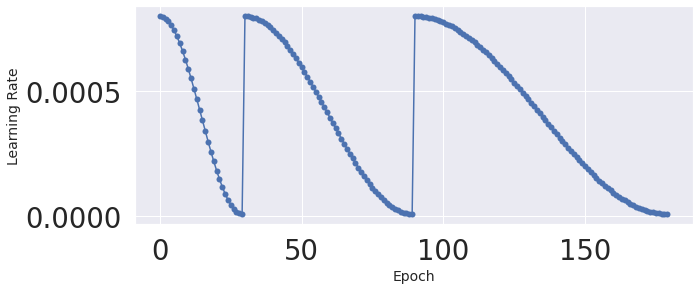

In [ ]:
# Thanks to Kaggle Notebook "TensorFlow Transformer - [0.112]"
import math

LR_START = 1e-3
LR_MAX = 8e-4
LR_MIN = 1e-5
LR_RAMPUP_EPOCHS = 0
LR_SUSTAIN_EPOCHS = 0
EPOCHS = 180
STEPS = [30, 60, 90]


def lrfn(epoch):
    if epoch<STEPS[0]:
        epoch2 = epoch
        EPOCHS2 = STEPS[0]
    elif epoch<STEPS[0]+STEPS[1]:
        epoch2 = epoch-STEPS[0]
        EPOCHS2 = STEPS[1]
    elif epoch<STEPS[0]+STEPS[1]+STEPS[2]:
        epoch2 = epoch-STEPS[0]-STEPS[1]
        EPOCHS2 = STEPS[2]
    
    if epoch2 < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch2 + LR_START
    elif epoch2 < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        decay_total_epochs = EPOCHS2 - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS - 1
        decay_epoch_index = epoch2 - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS
        phase = math.pi * decay_epoch_index / decay_total_epochs
        cosine_decay = 0.5 * (1 + math.cos(phase))
        lr = (LR_MAX - LR_MIN) * cosine_decay + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose = True)

rng = [i for i in range(EPOCHS)]
lr_y = [lrfn(x) for x in rng]
plt.figure(figsize=(10, 4))
plt.plot(rng, lr_y, '-o')
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}". \
          format(lr_y[0], max(lr_y), lr_y[-1]))
plt.xlabel('Epoch',size=14)
plt.ylabel('Learning Rate',size=14)
plt.show()
del lr_callback

In [ ]:
import keras.backend as K

def f1score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

## Train

In [ ]:
from sklearn.model_selection import StratifiedKFold
EPOCH = 180
BATCH_SIZE = 2**13 + 2**11
NUM_FOLD = 5

skf = StratifiedKFold(n_splits=NUM_FOLD, shuffle=True, random_state=42)

history = {}
for i, indices in enumerate(skf.split(X_train, y_train)):
    tf.keras.backend.clear_session()

    train_index, valid_index = indices
    print("="*15, f">> Fold no.{i+1} Trainging <<", "="*15)
    model = build_model()
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [f1score])
    
    checkpoint_folderpath = path + f"weights/{i}/"
    checkpoint_filepath = path + f"weights/{i}/weights"
    if os.path.isdir(checkpoint_folderpath):
        print(f"Loading Fold #{i} Weights")
        model.load_weights(checkpoint_filepath)
    
    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose = True)
    sv = tf.keras.callbacks.ModelCheckpoint(
            checkpoint_filepath, monitor='val_f1score', verbose=1, save_best_only=True,
            save_weights_only=True, mode='max', save_freq='epoch', options=None)
    # early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_f1score', patience=20, verbose=1)
    
    history[i] = model.fit(X_train[train_index], y_train[train_index], verbose=1,
                              validation_data=(X_train[valid_index], y_train[valid_index]),
                              epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[sv, lr_callback]) # early_stop
    print("\n\n")
    del model
    del optimizer
    del lr_callback
    del sv
    # del early_stop

## History

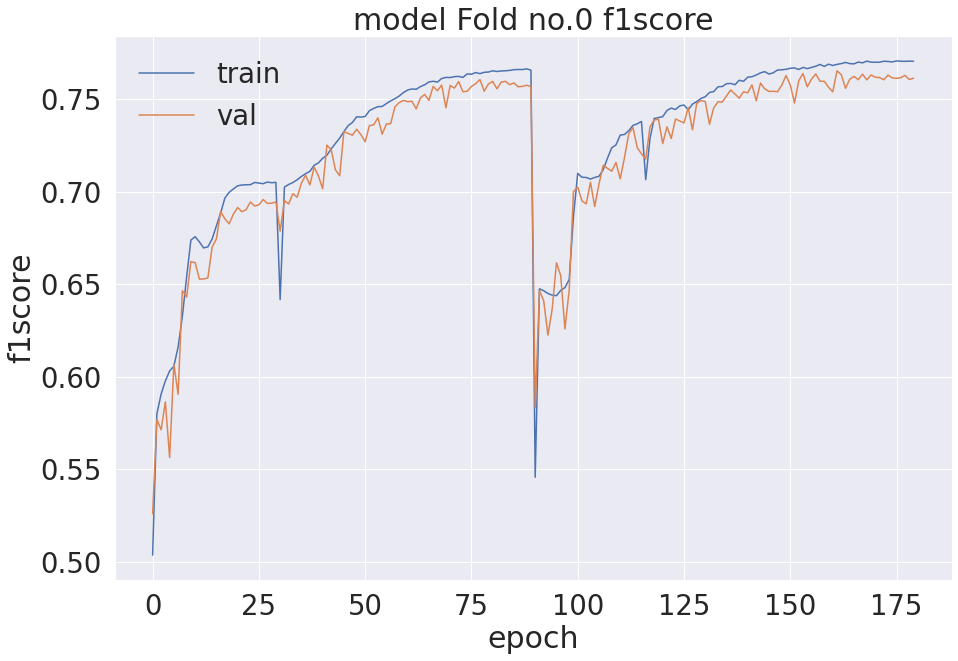

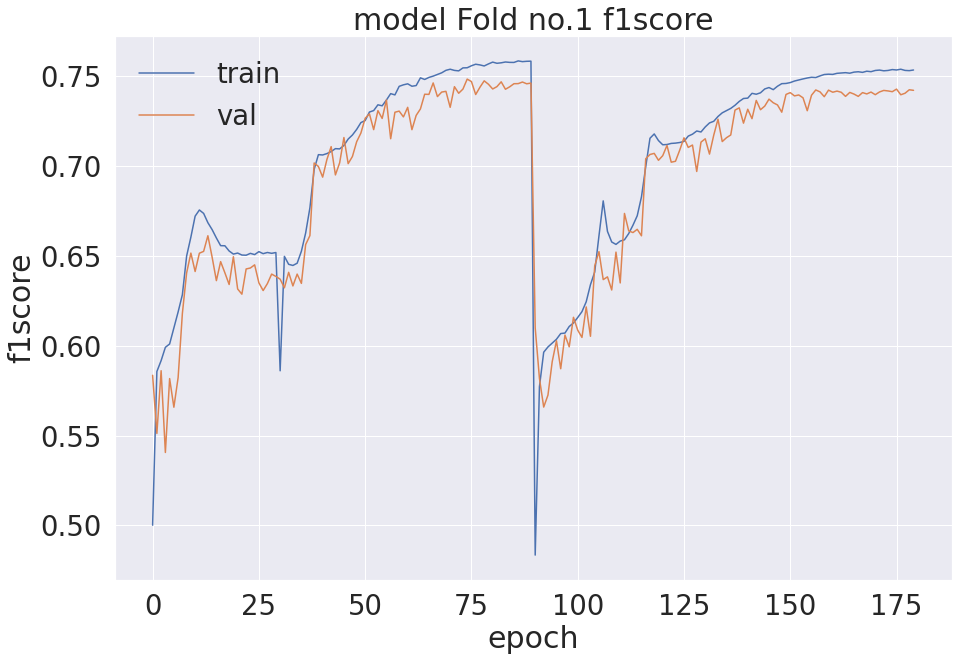

In [ ]:
row_num = 2 # 22.01.16 I run 2 models(no.0 and 1) # 5
# col_num = 1
# fig, ax = plt.subplots(col_num, row_num, figsize=(30, 30))
for i in range(row_num):
    plt.figure(figsize=(15,10))
    plt.plot(history[i].history['f1score'])
    plt.plot(history[i].history['val_f1score'])
    plt.title(f'model Fold no.{i} f1score')
    plt.ylabel('f1score')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

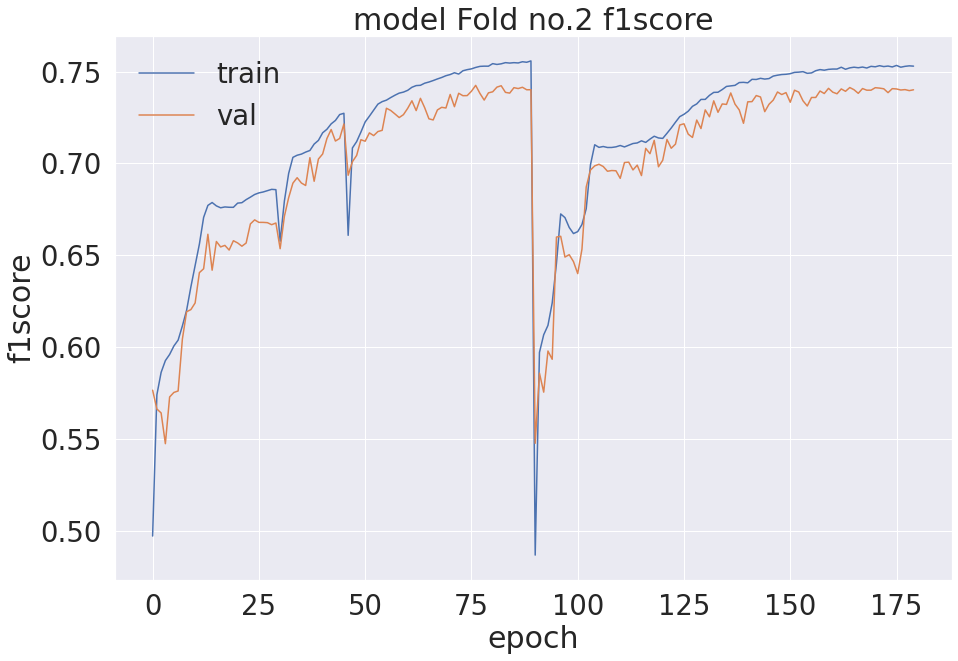

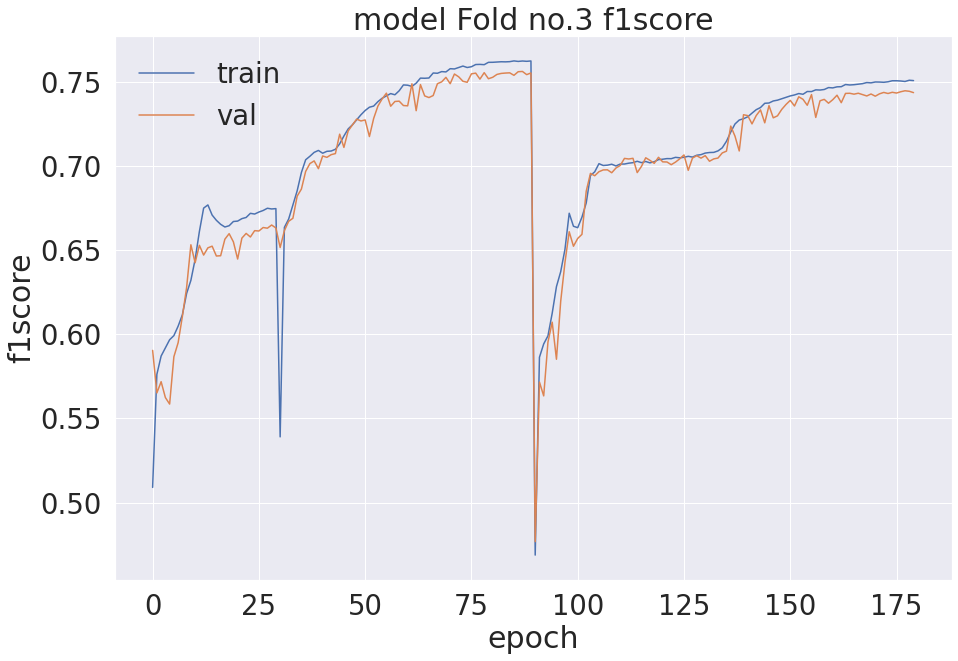

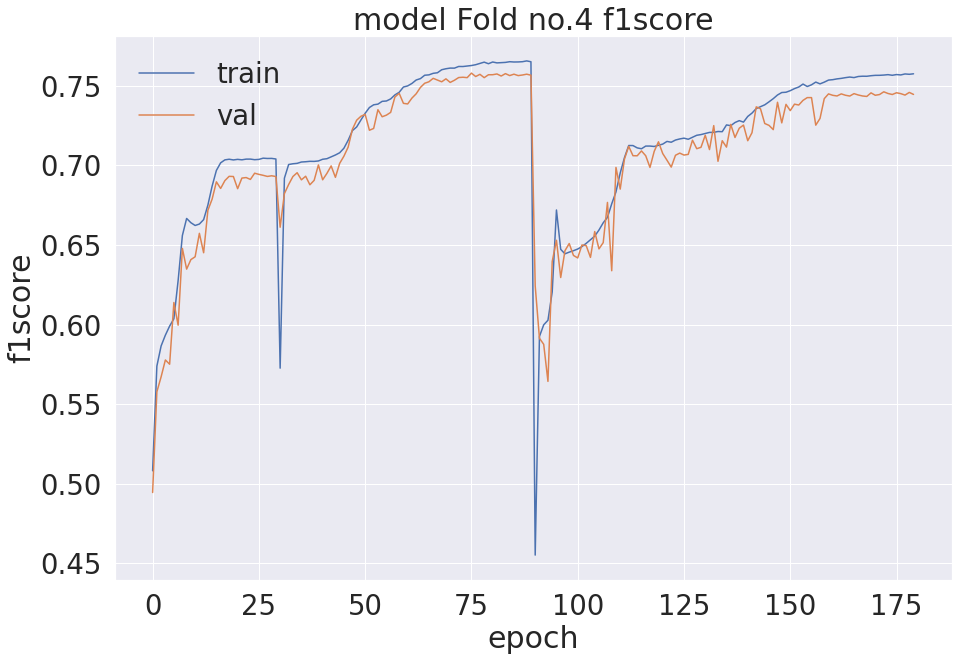

In [ ]:
row_num = 3 # 22.01.17 I run 3 models (no.3, 4, and 5) # 5
# col_num = 1
# fig, ax = plt.subplots(col_num, row_num, figsize=(30, 30))
for i in range(2, row_num+2):
    plt.figure(figsize=(15,10))
    plt.plot(history[i].history['f1score'])
    plt.plot(history[i].history['val_f1score'])
    plt.title(f'model Fold no.{i} f1score')
    plt.ylabel('f1score')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

#Stacking Model

In [ ]:
staking_model = tf.keras.models.Sequential([tf.keras.layers.Dense(5, activation='gelu'),
                                            tf.keras.layers.Dense(1, activation='sigmoid')])

# Stacking Training

stacked

In [ ]:
NUM_FOLD = 5
BATCH_SIZE = 2**13 + 2**11

prediction = np.zeros((X_train.shape[0], NUM_FOLD))

for i in range(0, NUM_FOLD):
    tf.keras.backend.clear_session()
    print(f'Fold {i+1} ~ Predictingt...', end=" ")

    model = build_model()
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [f1score])
    
    checkpoint_folderpath = path + f"weights/{i}/"
    checkpoint_filepath = path + f"weights/{i}/weights"
    if os.path.isdir(checkpoint_folderpath):
        print(f"and Loading Fold #{i} Weights")
        model.load_weights(checkpoint_filepath)

    prediction[:, i] = model.predict(X_train, batch_size=BATCH_SIZE, verbose=1)[:, 0]

    del model
    del optimizer

prediction.shape

Fold 1 ~ Predictingt... and Loading Fold #0 Weights
50/50 [==============================] - 18s 310ms/step
Fold 2 ~ Predictingt... and Loading Fold #1 Weights
50/50 [==============================] - 18s 309ms/step
Fold 3 ~ Predictingt... and Loading Fold #2 Weights
50/50 [==============================] - 18s 310ms/step
Fold 4 ~ Predictingt... and Loading Fold #3 Weights
50/50 [==============================] - 18s 310ms/step
Fold 5 ~ Predictingt... and Loading Fold #4 Weights
50/50 [==============================] - 19s 310ms/step


(501951, 5)

training stack

In [ ]:
EPOCH = 180
BATCH_SIZE = prediction.shape[0]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
staking_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [f1score])

checkpoint_folderpath = path + f"weights/stacking/"
checkpoint_filepath = path + f"weights/stacking/weights"
if os.path.isdir(checkpoint_folderpath):
    print(f"Loading Stacking Weights")
    staking_model.load_weights(checkpoint_filepath)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose = True)
sv = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath, monitor='val_f1score', verbose=1, save_best_only=True,
        save_weights_only=True, mode='max', save_freq='epoch', options=None)
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_f1score', patience=10)

history = staking_model.fit(prediction, y_train, verbose=1,
                          validation_split=0.1,
                          epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[sv, lr_callback]) # early_stop

## History

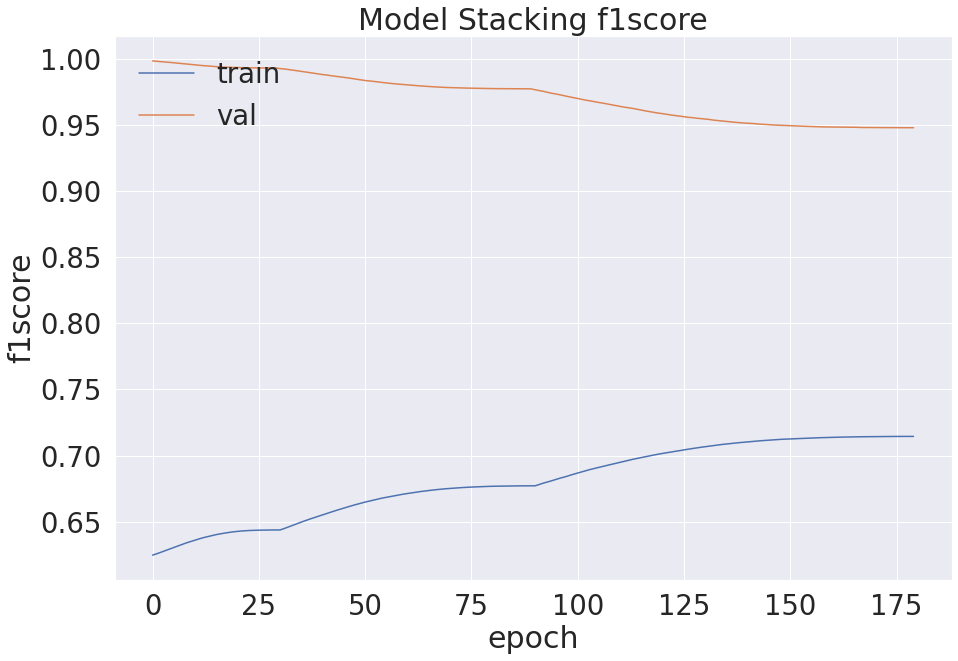

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['f1score'])
plt.plot(history.history['val_f1score'])
plt.title(f'Model Stacking f1score')
plt.ylabel('f1score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prediction

stacked

In [ ]:
NUM_FOLD = 5
BATCH_SIZE = 2**13 + 2**11

prediction = np.zeros((X_test.shape[0], NUM_FOLD))

for i in range(0, NUM_FOLD):
    print(f'Fold {i+1} ~ Predicting...', end=" ")

    model = build_model()
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [f1score])
    
    checkpoint_folderpath = path + f"weights/{i}/"
    checkpoint_filepath = path + f"weights/{i}/weights"
    if os.path.isdir(checkpoint_folderpath):
        print(f"and Loading Fold #{i} Weights")
        model.load_weights(checkpoint_filepath)

    prediction[:, i] = model.predict(X_test, batch_size=BATCH_SIZE, verbose=1)[:, 0]

Fold 1 ~ Predicting... and Loading Fold #0 Weights
5/5 [==============================] - 6s 406ms/step
Fold 2 ~ Predicting... and Loading Fold #1 Weights
5/5 [==============================] - 5s 279ms/step
Fold 3 ~ Predicting... and Loading Fold #2 Weights
5/5 [==============================] - 5s 279ms/step
Fold 4 ~ Predicting... and Loading Fold #3 Weights
5/5 [==============================] - 4s 278ms/step
Fold 5 ~ Predicting... and Loading Fold #4 Weights
5/5 [==============================] - 4s 278ms/step


model prediction

In [ ]:
prediction_mean = np.mean(prediction, axis=-1)
prediction_median = np.median(prediction, axis=-1)

stacking prediction

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
staking_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [f1score])

checkpoint_folderpath = path + f"weights/stacking/"
checkpoint_filepath = path + f"weights/stacking/weights"
if os.path.isdir(checkpoint_folderpath):
    print(f"Loading Stacking Weights")
    staking_model.load_weights(checkpoint_filepath)

prediction_stacking = staking_model.predict(prediction, batch_size=BATCH_SIZE, verbose=1)

Loading Stacking Weights
5/5 [==============================] - 0s 2ms/step


make binary

In [ ]:
from sklearn.preprocessing import Binarizer

def floatToInt(y):
    binarizer = Binarizer(threshold=0.5)
    y = binarizer.fit_transform(y)
    y = y.astype(np.int32)
    return y

prediction_mean = floatToInt(prediction_mean.reshape(-1, 1))
prediction_median = floatToInt(prediction_median.reshape(-1, 1))
prediction_stacking = floatToInt(prediction_stacking.reshape(-1, 1))

In [ ]:
prediction_stackByResult = (prediction_mean + prediction_median + prediction_stacking).astype('float')
prediction_stackByResult -= 1.5
prediction_stackByResult = (prediction_stackByResult > 0).astype(int)
prediction_stackByResult.shape

(46404, 1)

In [ ]:
prediction = (prediction[:, 0] + prediction[:, 1] + prediction[:, 2] + prediction[:, 3] + prediction[:, 4]).astype('float')
prediction -= 2.5
prediction = (prediction > 0).astype(int)
prediction.shape

(46404,)

make csv file

In [ ]:
submission = pd.read_csv(path + 'sample_submission.csv')

submission["target"] = prediction
submission.to_csv(path + f'submission.csv', index=False)

submission["target"] = prediction_mean
submission.to_csv(path + f'submission_mean.csv', index=False)

submission["target"] = prediction_median
submission.to_csv(path + f'submission_median.csv', index=False)

submission["target"] = prediction_stacking
submission.to_csv(path + f'submission_stacking.csv', index=False)

submission["target"] = prediction_stackByResult
submission.to_csv(path + f'submissionn_stackByResult.csv', index=False)